Bước 1: Tạo bộ dữ liệu đơn giản cho các chữ cái theo ma trận nhị phân, đại diện điểm ảnh 5x6

In [25]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

Bước 2: Trực quan hóa bằng thư viện **matplotlib**

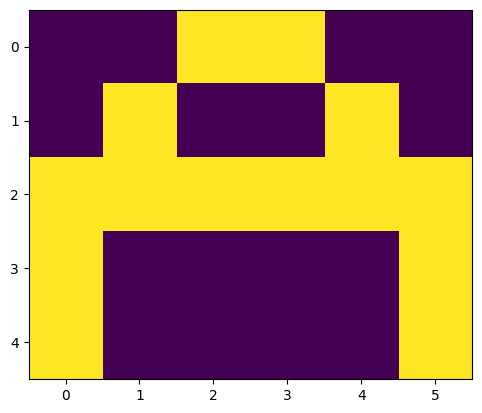

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

Bước 3: Chuyển dữ liệu dạng list sang dạng mảng numpy

In [27]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


Bước 4: Xác định cấu trúc các lớp bao gồm:
- Input: lớp 30 nút(5x6)
- Hidden: lớp 5 nút
- Output: lớp 3 nút

Bước 5: Định nghĩa các hàm: sử dụng hàm kích hoạt sigmoid, tính toán đầu ra, cập nhật trọng số và tính toán lỗi

In [28]:
# activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)    # input from layer 1
    a1 = sigmoid(z1)  # out put of layer 2
    z2 = a1.dot(w2)   # input of out layer
    a2 = sigmoid(z2)  # output of out layer
    return(a2)

# initializing the weights randomly
def generate_wt(x, y):
    li =[]
    for i in range(x * y):
        li.append(np.random.randn())
    return(np.array(li).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

    # hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                (np.multiply(a1, 1-a1)))
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return(w1, w2)

Bước 6: Khởi tạo trọng số ngẫu nhiên cho Hidden và Output

In [29]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.58290346  1.55927558 -1.19105552 -0.77888955  1.34615446]
 [-0.67125871 -0.02721325  0.83188924 -0.75433675  0.40639501]
 [ 1.07804564 -0.35498447  1.2315552   0.42870942  0.19082703]
 [ 0.16469868  0.62632474 -0.79242198 -1.01257736 -0.96118076]
 [-1.62350305  0.8335189   1.22694092 -1.04387149  0.14784002]
 [-0.41395227  1.14015049 -0.34553363 -0.90433815 -1.19361393]
 [-1.51330969  0.45939167 -0.21366798  0.83225602  1.91380962]
 [ 0.04579669 -0.79820659 -0.4835561   0.96119278 -0.34570678]
 [-1.0284217  -0.01677081  0.44989553  0.40517563 -1.4279027 ]
 [ 0.80013503 -0.20492094  0.28046906 -1.65422378  0.96002123]
 [ 0.77246324  0.86657515 -0.44663861  1.4465145  -1.21578261]
 [-0.47322337 -0.39514613 -1.49131418 -1.02672905 -0.24956124]
 [ 1.86781444 -0.84603392  0.30079097  0.63864451 -0.42964006]
 [-0.06942594 -0.5657707   0.47239567  0.67344768 -0.33445067]
 [ 1.69836067  0.8013724   0.9967558  -0.93813965  0.81928902]
 [ 1.7721814   0.81192548  1.64899693  1.08549712  1.12

Bước 7: Huấn luyện mô hình bằng hàm train

In [30]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 69.74925992445111
epochs: 2 ======== acc: 71.42831173111261
epochs: 3 ======== acc: 73.05084806639397
epochs: 4 ======== acc: 74.63536910864832
epochs: 5 ======== acc: 76.16401759286283
epochs: 6 ======== acc: 77.59527071749717
epochs: 7 ======== acc: 78.89201160104564
epochs: 8 ======== acc: 80.04170529208811
epochs: 9 ======== acc: 81.05417461210698
epochs: 10 ======== acc: 81.94912633160556
epochs: 11 ======== acc: 82.74696774597793
epochs: 12 ======== acc: 83.46509776269421
epochs: 13 ======== acc: 84.11727329489926
epochs: 14 ======== acc: 84.71410043121472
epochs: 15 ======== acc: 85.26375560114349
epochs: 16 ======== acc: 85.77262670282974
epochs: 17 ======== acc: 86.24580362257397
epochs: 18 ======== acc: 86.68742969244254
epochs: 19 ======== acc: 87.10094618640862
epochs: 20 ======== acc: 87.48926099180896
epochs: 21 ======== acc: 87.85486574638705
epochs: 22 ======== acc: 88.19991865871368
epochs: 23 ======== acc: 88.52630460255982
epochs: 24 ======== 

Bước 8: Trực quan hóa

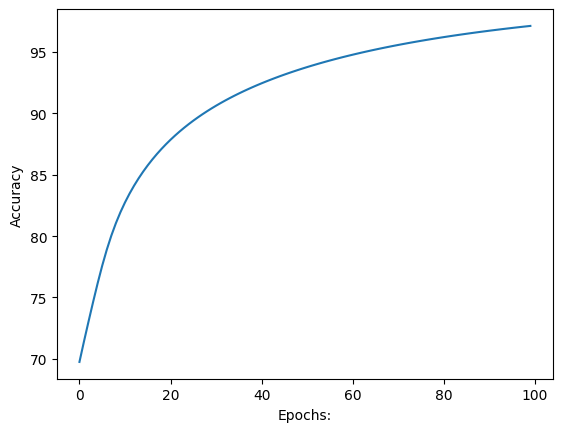

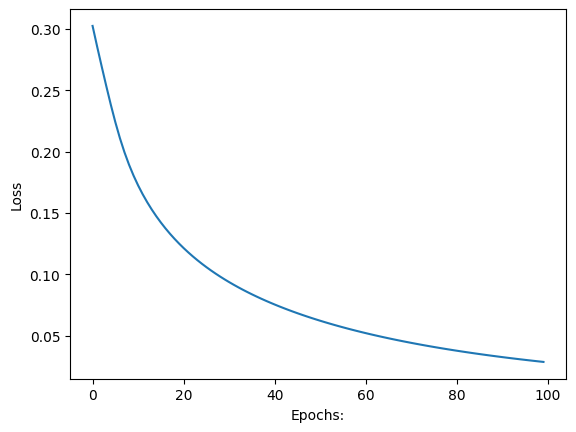

In [31]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Bược 9: Dự đoán

Image is of letter B.


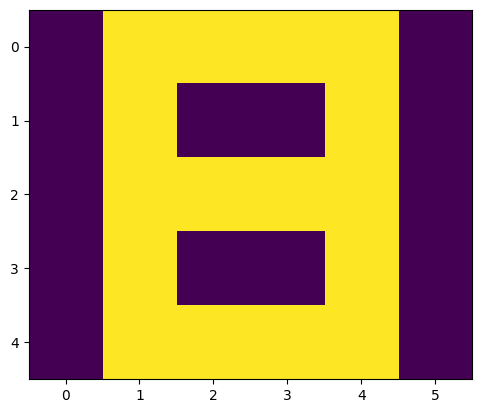

In [32]:
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()

# Example: Predicting for letter 'B'
predict(x[1], w1, w2)

#Nhận xét

Hiệu suất học tập rất tốt: Accuracy tăng nhanh và đều đặn, sau đó tăng chậm để tiệm cận mức tối ưu.

Quá trình huấn luyện ổn định: Loss giảm liên tục và không dao động mạnh, đạt giá trị rất thấp trong những epoch cuối cùng.

Kết quả cuối cùng: Mô hình nhận dạng ký tự chính xác, xác nhận khả năng hoạt động hiệu quả cho bài toán.